In [1]:
from FESTIM import Simulation
from fenics import plot
import matplotlib.pyplot as plt
parameters = {}

# 1D meshes

## Mesh from vertices

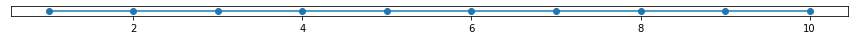

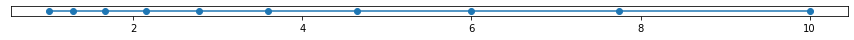

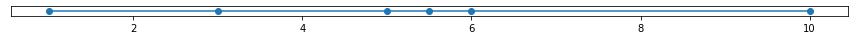

In [2]:
import numpy as np

def plot_mesh(mesh):
    plt.figure(figsize=(15, 1))
    plot(mesh)

my_sim = Simulation(parameters)

# linspace
vertices = np.linspace(1, 10, num=10)

parameters["mesh_parameters"] = {
    "vertices": vertices
}
my_sim.parameters = parameters
mesh = my_sim.define_mesh()

plot_mesh(mesh)

# logspace
vertices = np.logspace(0, 1, num=10)

parameters["mesh_parameters"] = {
    "vertices": vertices
}
my_sim.parameters = parameters
mesh = my_sim.define_mesh()

plot_mesh(mesh)

# custom
vertices = [1, 3, 5, 5.5, 6, 10]

my_sim.parameters = parameters
mesh = my_sim.define_mesh()

plot_mesh(mesh)

## Iterative refinements

Meshing ...
Mesh size before local refinement is 10
Mesh size after local refinement is 25
Mesh size before local refinement is 25
Mesh size after local refinement is 33


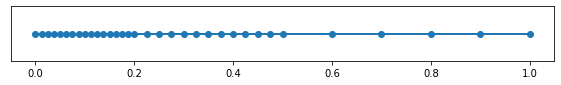

In [3]:
parameters["mesh_parameters"] = {
    "size": 1,
    "initial_number_of_cells": 10,
    "refinements": [
        {
            "cells": 6,
            "x": 0.5
        },
        {
            "cells": 5,
            "x": 0.2
        }
    ],
}

my_sim.parameters = parameters
mesh = my_sim.define_mesh()

plt.figure(figsize=(60, 1))
plt.figure()
plot(mesh)

# 1D & 2D meshes

## Mesh created with FEniCS

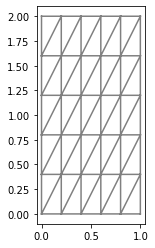

In [4]:
from fenics import Point, RectangleMesh, CompiledSubDomain, MeshFunction

# creating a mesh with FEniCS
nx = ny = 5
mesh_fenics = RectangleMesh(Point(0, 0), Point(1, 2), nx, ny)

# marking physical groups (volumes and surfaces)
volume_markers = MeshFunction("size_t", mesh_fenics, mesh_fenics.topology().dim())

tol = 1e-14
subdomain_1 = CompiledSubDomain('x[1] <= 0.5 + tol', tol=tol)
subdomain_2 = CompiledSubDomain('x[1] >= 0.5 - tol', tol=tol)

volume_markers.set_all(1)
subdomain_1.mark(volume_markers, 1)
subdomain_2.mark(volume_markers, 2)


left_surface = CompiledSubDomain('on_boundary && near(x[0], 0, tol)',
                                tol=tol)
right_surface = CompiledSubDomain('on_boundary && near(x[0], 1, tol)',
                                     tol=tol)
surface_markers = MeshFunction("size_t", mesh_fenics, mesh_fenics.topology().dim() - 1)
surface_markers.set_all(0)
left_surface.mark(surface_markers, 1)
right_surface.mark(surface_markers, 2)

# creating mesh with FESTIM
parameters["mesh_parameters"] = {
    "mesh": mesh_fenics,
    "meshfunction_cells": volume_markers,
    "meshfunction_facets": surface_markers,
}

my_sim.parameters = parameters
mesh = my_sim.define_mesh()

plt.figure()
plot(mesh)

## Mesh from XDMF file

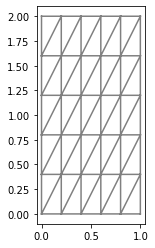

In [5]:
# create an XDMF file
from fenics import XDMFFile

mesh_file = XDMFFile("mesh.xdmf")
mesh_file.write(mesh)

sm_file = XDMFFile("surface_markers.xdmf")
mesh_file.write(volume_markers)
sm_file.write(surface_markers)

# creating mesh with FESTIM
parameters["mesh_parameters"] = {
    "mesh_file": "mesh.xdmf",
    "cells_file": "mesh.xdmf",
    "facets_file": "surface_markers.xdmf",
}

my_sim.parameters = parameters
mesh = my_sim.define_mesh()

plt.figure()
plot(mesh)